# Clustering
FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.14.월 14:00-18:00

### 1. Data
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

### 2. Hierarchical Clustering 
- 2-1. `sklearn.cluster.AgglomerativeClustering`
- 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`

### 3. K-means
- 3-1. `sklearn.cluster.KMeans`

### 4. Analysis 
- 4-1. Choose K : Using Silhouette Plot
- 4-2. .groupby()

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
- 5-1. More Preprocessing
- 5-2. 비누 구매 고객 세분화
- 5-3. 타겟 클러스터 선정 및 마케팅 기획

### 1. Data
---
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

#### 1-1.  `BathSoap.xlsx`
---
- sheet3 : DM_Sheet, 멤버 정보 및 비누 구입 정보
- sheet4 : Durables, 멤버들의 비누 이외 타물품 소유 정보
---
비누를 구매한 고객들의 데이터를 토대로 군집화를 이용하여 효과적인 마케팅 전략을 수립하려고 한다. 총 600개의 표본을 각종 변수를 고려하여 치밀하게 표집하였다. 주어진 데이터는 각종 인구통계자료, 내구재 소유 자료, 제품의 카테고리와 각 브랜드에 대한 구매 데이터이다.

*Q. 군집화는 마케팅 전략을 세우는데 어떤 역할을 할 수 있는가?*

#### 1-2. Data Load : `pd.read_excel`
---
`BathSoap.xlsx` 파일에서 데이터가 있는 sheet를 DataFrame으로 변환
* pd.read_excel document 참고
* sheet 위치, header로 쓸 row를 잘 지정할 것
* row의 시작은 0

In [2]:
import pandas as pd

In [8]:
# df
df = pd.read_excel('BathSoap.xlsx', 2, header=2)

In [6]:
# durable_df
durable_df = pd.read_excel('BathSoap.xlsx', 3, header=4)

#### 1-3. Join Table : `pd.merge`
---
DM_Sheet와 Durables의 DataFrame을 통합
* 'Member id', 'MEM'을 기준으로 통합, Inner Join

In [9]:
# merged_df & set_index
merged_df = df.merge(durable_df, how="inner", left_on='Member id', right_on='MEM').set_index('Member id')

#### 1-4. Delete Rows & Columns
---
* Delete Rows : 결측치가 있는 행은 지울 것
* Delete Columns : 겹치거나 문제가 있는 열을 지울 것

In [23]:
# Delete Rows : no_nan_df 
no_nan_df = merged_df[merged_df.isnull().sum(axis=1) == 0]

In [24]:
# Delete columns : X_df
X_df = no_nan_df.drop(['MEM', 'Unnamed: 1'], axis=1)

### 2. Hierarchical Clustering 
---


#### 2-1. `sklearn.cluster.AgglomerativeClustering`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [25]:
# import packages
from sklearn.cluster import AgglomerativeClustering

In [26]:
# parameter setting
n_clusters = 5

In [31]:
# sklearn_hc_model
sklearn_hc_model = AgglomerativeClustering(n_clusters=n_clusters)

In [32]:
# fit to model
sklearn_hc_model.fit(X_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x7efbd40621e0>)

In [33]:
# get predicted labels
predicted_labels_sklearn = sklearn_hc_model.labels_
#sklearn_model.fit_predict(X_df)

In [35]:
# add result column to copied df
result_df = X_df.copy()
result_df['sklearn_labels'] = predicted_labels_sklearn

#### 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`
---
- Linkage Matrix
- Dendromgram & Set k
- get predicted_labels 

##### Linkage Matrix : `scipy.cluster.hierarchy.linkage`

In [36]:
# import packages
from scipy.cluster.hierarchy import linkage

In [39]:
# Z = linkage(X, method)
Z = linkage(X_df, 'centroid')

In [40]:
# What is Z, linkage?
Z[:10]

array([[ 1038.,  1039.,     0.,     2.],
       [   64.,    65.,     0.,     2.],
       [ 1070.,  1071.,     0.,     2.],
       [ 1072.,  1073.,     0.,     2.],
       [  268.,   269.,     0.,     2.],
       [ 1096.,  1097.,     0.,     2.],
       [  274.,   275.,     0.,     2.],
       [ 1104.,  1105.,     0.,     2.],
       [ 1108.,  1109.,     0.,     2.],
       [ 1110.,  1111.,     0.,     2.]])

##### Dendrogram & Set k : `scipy.cluster.hierarchy.dendrogram`

In [41]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [42]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Index of Data')
    plt.ylabel('Distance')

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

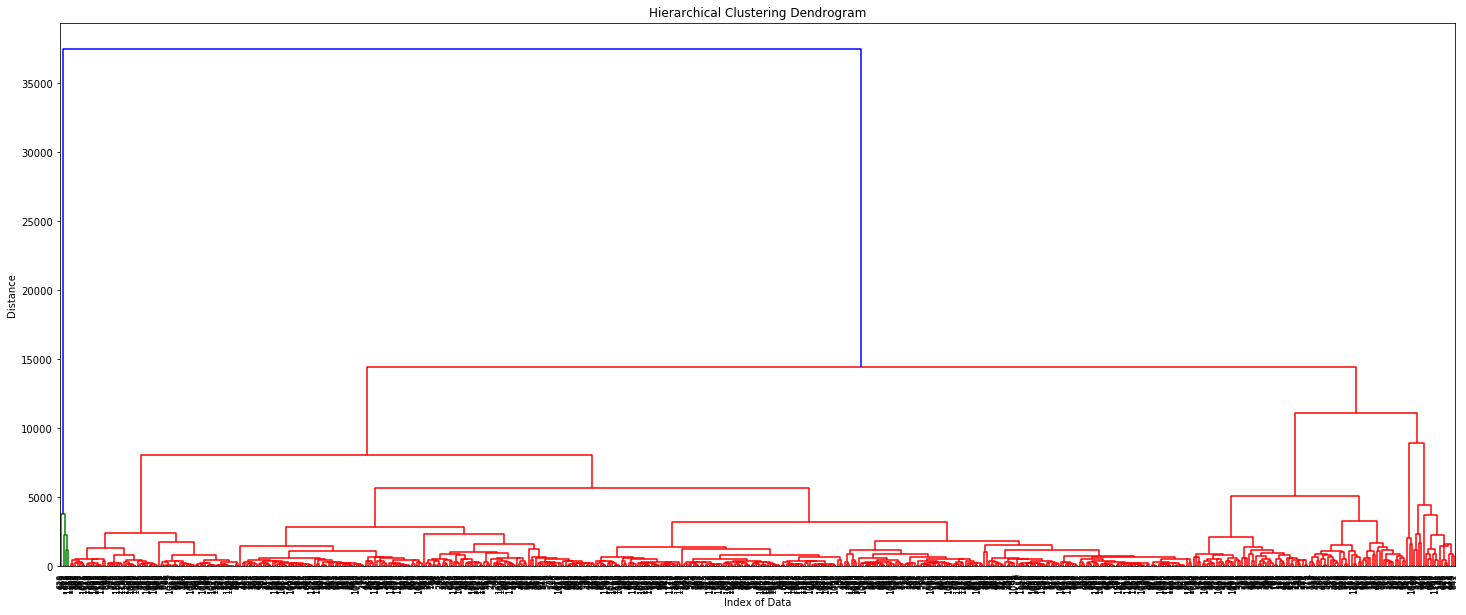

In [43]:
# plot dendrogram
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', 
                Z)

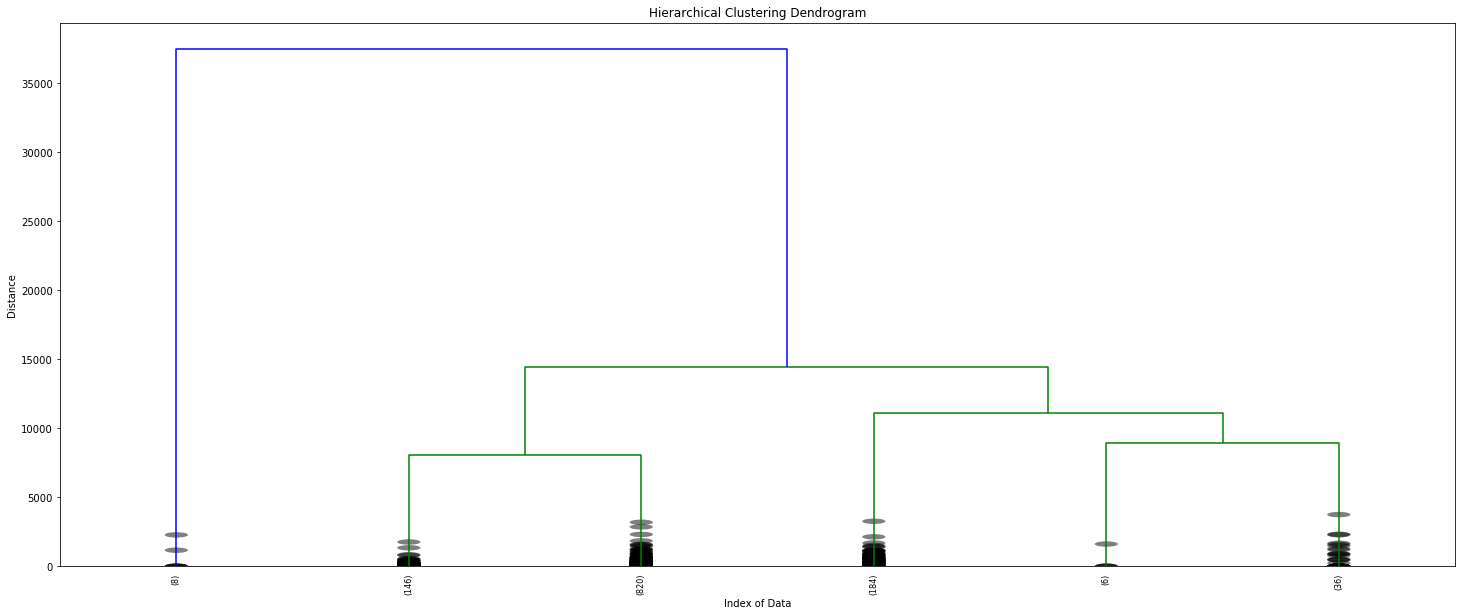

In [44]:
# Dendrogram에 표현할 가지의 개수 정하기 - set p
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', 
                Z, p=6)

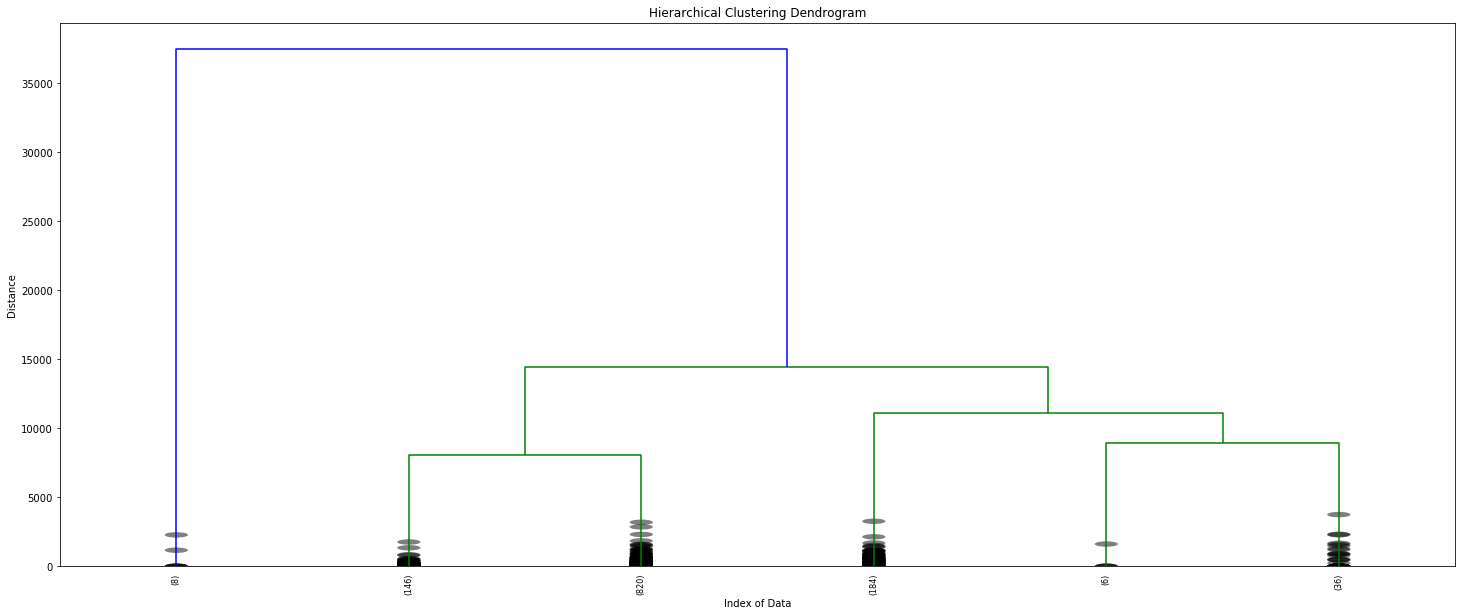

In [45]:
# k를 결정하기 위해, k보다 큰 개수의 p를 가진 dendrogram을 그리고, max_distance를 결정한다.
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', 
                Z, p=6)
max_d = 45000

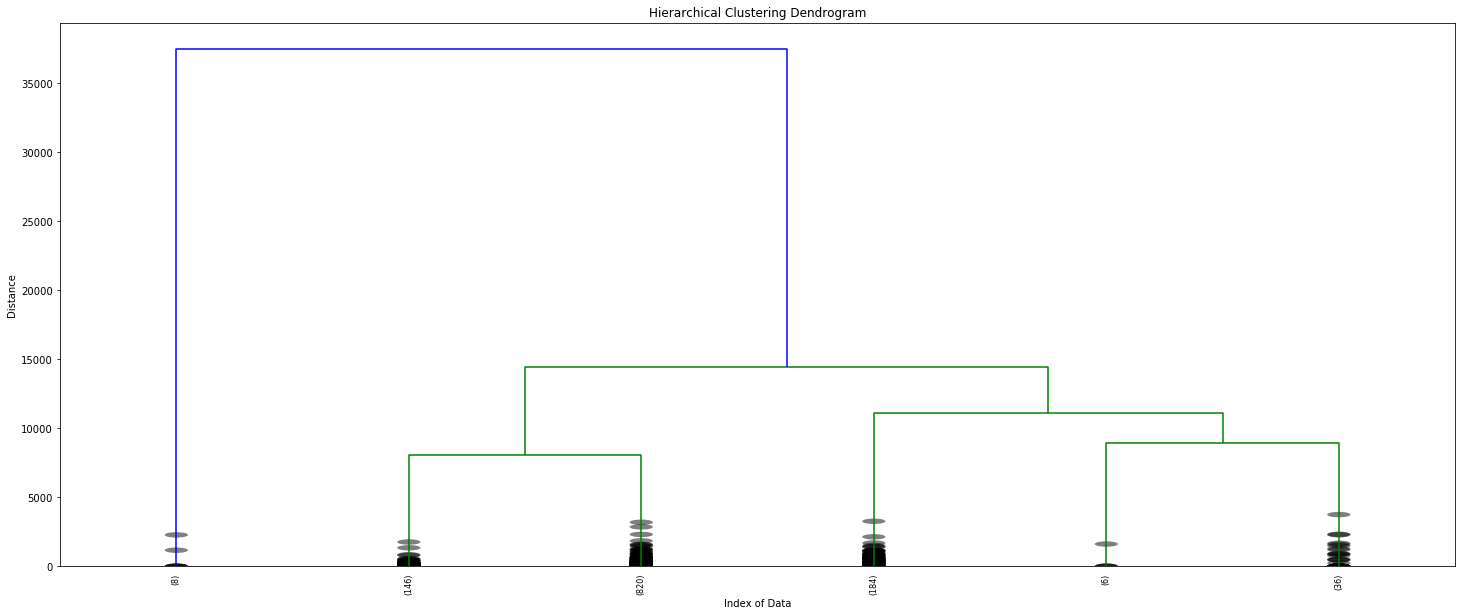

In [46]:
# max_distance에 해당하는 선을 Dendrogram에 그려서 원하는 k를 표현하기 위한 max_distance를 확정한다.
plot_dendrogram('Hierarhcical Clustering Dendrogram', 'Index of Data', 'Distance', 
                Z, p=6, max_d=max_d)

##### predicted_labels : `scipy.cluster.hierarchy.fcluster`

In [47]:
# import packages
from scipy.cluster.hierarchy import fcluster

In [48]:
# predicted_labels
predicted_labels_scipy = fcluster(Z, max_d, criterion='distance')

In [49]:
# save to result_df
result_df['scipy_labels'] = predicted_labels_scipy

### 3. K-Means
---
##### 3-1. `sklearn.cluster.KMeans`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [50]:
from sklearn.cluster import KMeans

In [51]:
# set parameters
n_clusters = 5

In [52]:
# kmeans_model
kmeans_model = KMeans(n_clusters=n_clusters)

In [54]:
kmeans_model.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
# predicted_labels
predicted_labels_kmeans = kmeans_model.labels_
#kmeans_model.fit_predict(preprocessed_df)

In [56]:
# cluster_centers_
kmeans_model.cluster_centers_

array([[  2.18965517e+00,   1.37931034e+00,   5.75287356e+00,
          1.28735632e+00,   3.04597701e+00,   3.38505747e+00,
          2.47126437e+00,   3.59770115e+00,   6.72413793e-01,
          1.41666667e+01,   3.01724138e+00,   1.07643678e+01,
          4.43715517e+03,   1.72931034e+01,   5.61556897e+02,
          1.93580220e+00,   3.11616011e+02,   1.28379323e+01,
          8.99428931e-01,   5.97473102e-02,   4.08237590e-02,
          1.84897866e-01,   1.02360854e-01,   4.20754962e-02,
          3.29272360e-02,   2.92560466e-02,   2.58376005e-02,
          3.09164905e-02,   1.49804609e-02,   5.36747950e-01,
          3.64026674e-01,   4.57616063e-01,   1.11614490e-01,
          6.67427725e-02,   4.51546925e-01,   7.42605453e-02,
          1.05989568e-01,   1.02050023e-01,   2.31715892e-02,
          3.13979723e-02,   3.15715771e-02,   1.10493097e-02,
          3.63974645e-02,   1.09367174e-01,   2.31978522e-02,
          0.00000000e+00,   2.47126437e-01,   1.49425287e-01,
        

In [57]:
# add result to result_df
result_df['kmeans_labels'] = predicted_labels_kmeans

### 4. Analysis
---
#### 4-1. Choose k : Using Silhouette Plot
---

In [65]:
# import packages
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np

In [66]:
# silhouette_avg
silhoutette_avg = silhouette_score(X_df, result_df['kmeans_labels'])

In [67]:
# silhouette_value of each data
sample_silhouette_values = silhouette_samples(X_df, result_df['kmeans_labels'])

In [68]:
def plot_silhouette(X_df, labels):
    cluster_labels = sorted(np.unique(labels))
    n_clusters = len(cluster_labels)
    
    plt.figure()

    # axis setting
    ax = plt.gca()
    ax.set_xlim([-0.5, 1])
    ax.set_ylim([0, X_df.shape[0] + (n_clusters + 1) * 10])

    y_lower = 10
    
    silhouette_avg = silhouette_score(X_df, labels)
    print("k : {}".format(n_clusters))
    print("silhouette_avg : {}".format(silhouette_avg))
    data_silhouette_values = silhouette_samples(X_df, labels)

    for i in cluster_labels:
        # 특정 클러스터의 silhouette 값만 추출
        ith_cluster_silhouette_values = data_silhouette_values[labels == i]
        
        # 내림차순으로 정렬
        ith_cluster_silhouette_values.sort()

        # 해당 클러스터의 크기
        size_cluster_i = len(ith_cluster_silhouette_values)
       
        # 클러스터의 silhouette을 표시할 y축 최고값 결정
        y_upper = y_lower + size_cluster_i

        # 색
        color = cm.spectral(float(i) / n_clusters)
        
        # plot silhouette
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # y축에 클러스터 이름 표시
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 클러스터의 silhouette을 표시할 최저점 조정
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for k={}".format(n_clusters))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # silhouette 평균 값을 나타내는 선
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # y축 값 제거
    ax.set_yticks([])

    plt.show() 

k : 2
silhouette_avg : 0.6076315274300674


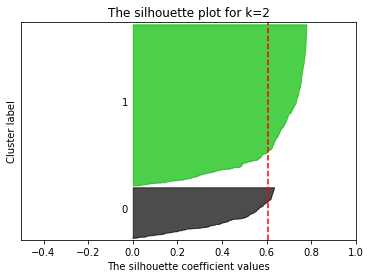

k : 3
silhouette_avg : 0.535543526103045


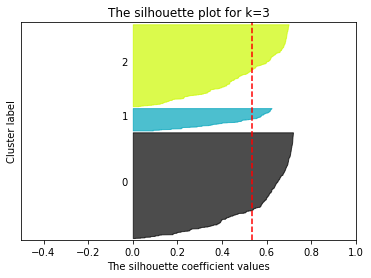

k : 4
silhouette_avg : 0.5206601603698584


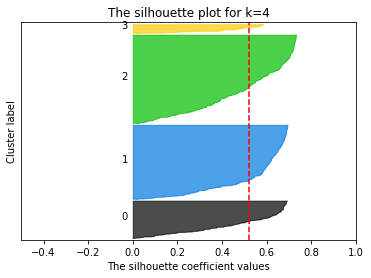

k : 5
silhouette_avg : 0.5098596535908152


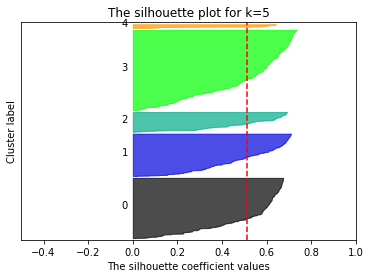

In [70]:
# plot silhouette for choosing k
k_candidates = [2, 3, 4, 5]
for i in k_candidates:
    ith_model = KMeans(n_clusters=i)
    labels = ith_model.fit_predict(X_df)
    plot_silhouette(X_df, labels)

#### 4-2. groupby()

In [ ]:
result_df.groupby('scipy_labels').mean()

*Q. 지금까지 진행해온 분석의 문제점은?*
- 범주형 변수를 수치형 변수처럼 분석함
- 수치형 데이터가 동일한 범위를 갖지 않음
- 구매와 관련된 변수만 선택되지 않았음

In [71]:
# Hint 1
result_df.groupby('sklearn_labels').mean().iloc[:, :10]

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index
sklearn_labels,,,,,,,,,,
0,2.795455,2.522727,10.159091,2.000000,3.500000,4.022727,6.522727,3.068182,1.068182,18.363636
1,2.873786,2.582524,9.495146,1.912621,3.320388,3.844660,5.543689,2.873786,1.019417,17.854369
2,2.290043,2.051948,8.311688,1.848485,3.194805,4.714286,3.744589,3.168831,1.008658,19.307359
3,2.664430,2.201342,8.986577,1.892617,3.241611,4.241611,4.778523,3.107383,1.006711,17.328859
4,2.123288,0.684932,3.054795,0.671233,2.890411,1.808219,1.095890,4.301370,0.328767,7.164384


In [72]:
# Hint 2 
X_df.iloc[:10, 11:46]

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Radio/Transistor with FM
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,17.0,8025.0,24.0,818.0,1.411765,334.375000,10.193146,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.0
1010010.0,17.0,8025.0,24.0,818.0,1.411765,334.375000,10.193146,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.0
1010020.0,25.0,13975.0,40.0,1681.5,1.600000,349.375000,12.032200,0.887299,0.096601,0.016100,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.0
1010020.0,25.0,13975.0,40.0,1681.5,1.600000,349.375000,12.032200,0.887299,0.096601,0.016100,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.0
1014020.0,37.0,23100.0,63.0,1950.0,1.702703,366.666667,8.441558,0.941558,0.019481,0.038961,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.0
1014020.0,37.0,23100.0,63.0,1950.0,1.702703,366.666667,8.441558,0.941558,0.019481,0.038961,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.0
1014030.0,4.0,1500.0,4.0,114.0,1.000000,375.000000,7.600000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.0
1014030.0,4.0,1500.0,4.0,114.0,1.000000,375.000000,7.600000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.0
1014190.0,6.0,8300.0,13.0,591.0,2.166667,638.461538,7.120482,0.614458,0.144578,0.240964,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.0


In [73]:
# Hint 3 : 현재 변수의 개수
X_df.columns

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index',
       ...
       'Personal/Home Computers', 'Computer Printers', 'Fax Machine',
       'Video camera/Handycam', 'Radio Clock', 'Deep Freezer',
       'Electirc Kettle\t\t', 'Dish Washing Machine', 'Kitchen Sink',
       'Floor Polisher'],
      dtype='object', length=113)

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
---
#### 5-1. More Preprocessing
---
##### 1. pd.get_dummies

In [74]:
list(X_df.columns)

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black 

In [75]:
# dummify needed cols =
# dummified_df
dummy_needed_cols = ['FEH','MT', 'SEX', 'CHILD', 'CS']
dummified_df = pd.get_dummies(X_df, columns=dummy_needed_cols)

In [76]:
list(dummified_df.columns)

['SEC',
 'AGE',
 'EDU',
 'HS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black & White',
 'Colour TV with remote',
 'Co

##### 2. Scaling

In [77]:
# scale needed cols = 
# scaled_df 
scale_needed_cols = dummified_df.columns[4:13]
scaled_df = dummified_df.copy()
scaled_df[scale_needed_cols] = (X_df[scale_needed_cols] - X_df[scale_needed_cols].mean())/ X_df[scale_needed_cols].std()

In [78]:
scaled_df[scale_needed_cols]

,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price
Member id,,,,,,,,,
1010010.0,-1.316929,-0.403196,0.120123,-0.500799,-0.410639,-0.588348,-0.463184,-0.324446,-0.438742
1010010.0,-1.316929,-0.403196,0.120123,-0.500799,-0.410639,-0.588348,-0.463184,-0.324446,-0.438742
1010020.0,0.173603,0.863388,0.889935,0.265250,0.507846,0.389804,-0.390886,-0.264122,0.052825
1010020.0,0.173603,0.863388,0.889935,0.265250,0.507846,0.389804,-0.390886,-0.264122,0.052825
1014020.0,0.524317,0.863388,2.044653,1.440072,1.828168,0.693954,-0.351440,-0.194582,-0.906929
1014020.0,0.524317,0.863388,2.044653,1.440072,1.828168,0.693954,-0.351440,-0.194582,-0.906929
1014030.0,-1.492286,-1.036488,-1.130822,-1.340877,-1.558746,-1.385823,-0.621335,-0.161068,-1.131872
1014030.0,-1.492286,-1.036488,-1.130822,-1.340877,-1.558746,-1.385823,-0.621335,-0.161068,-1.131872
1014190.0,-0.615502,-0.403196,-0.938369,-0.465393,-1.042098,-0.845489,-0.173240,0.898467,-1.260044


#### 5-2. 비누 구매 고객 세분화
---
- 구매 행동(구매량, 빈도, 할인에 대한 민감성, 브랜드 충성도), 구매 기반(가격, 구매제의) 등의 변수를 이용하여 군집화하라
- 어떤 군집화 방법을 선택할 것인가? 그 이유는 무엇인가?
- k는 몇 개로 선택할 것인가? 한번에 진행 가능한 마케팅 전략이 2~5개라고 할 때 k의 개수는 타당한가? 

##### 변수 선택
---
구매행태에 관련있는 No. of Brands ~ PropCat 15까지를 구매 패턴과 관련된 군집화의 변수로 사용한다.

In [79]:
# Select Features
selected_feautures = scaled_df.columns[5:40]
selected_features_df = scaled_df[selected_feautures]

##### 방법 선정
---
AgglomerativeClustering을 사용한다. Dendrogram을 통해 클러스터의 거리 차를 토대로 k를 선정할 수 있으며, 현실적인 상황에서 k를 조절하기도 쉬운 방법이다.

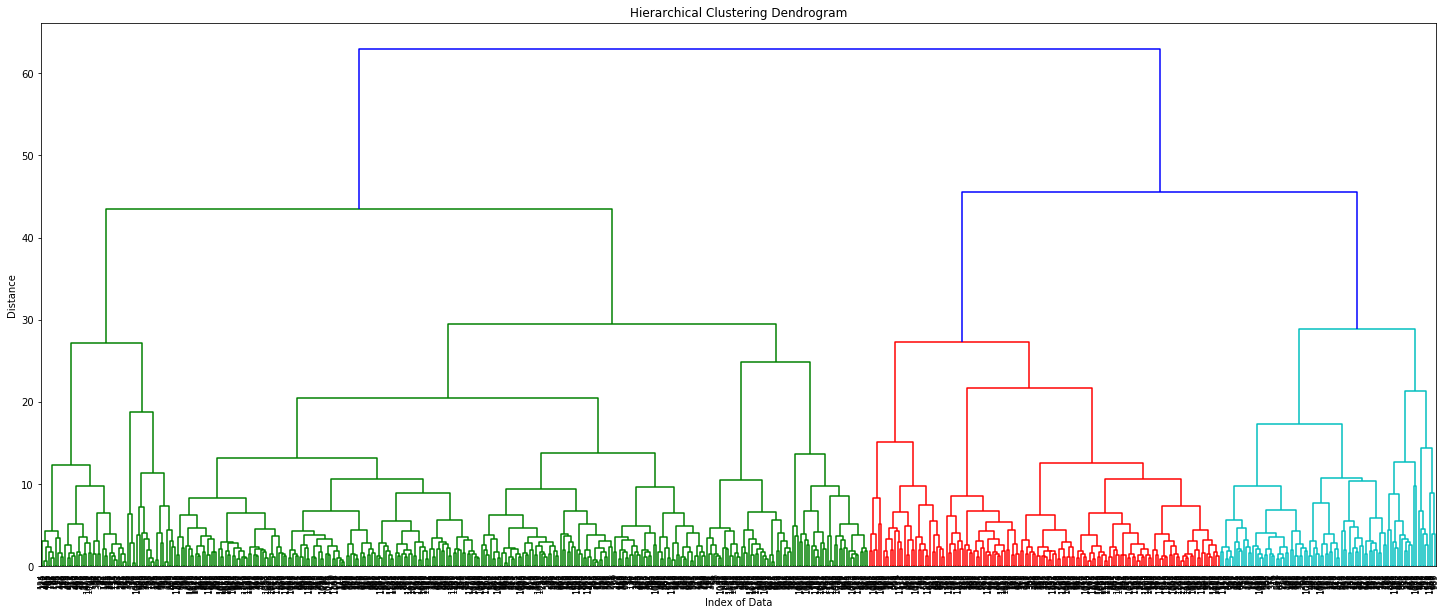

In [80]:
# Choose Methods
Z = linkage(selected_features_df, 'ward')
plot_dendrogram('Bath Soap Member Clustering', "Index", 'Distance'
                , Z)

##### k 선정
---
Dendrogram 상으로 보았을 때 4개의 k를 선정하는 것이 가장 타당한 것으로 보인다. 수립할 수 있는 마케팅 전략의 개수와 유사하며, 클러스터간의 거리 차가 다른 경우에 비해 뚜렷하게 구분된다.

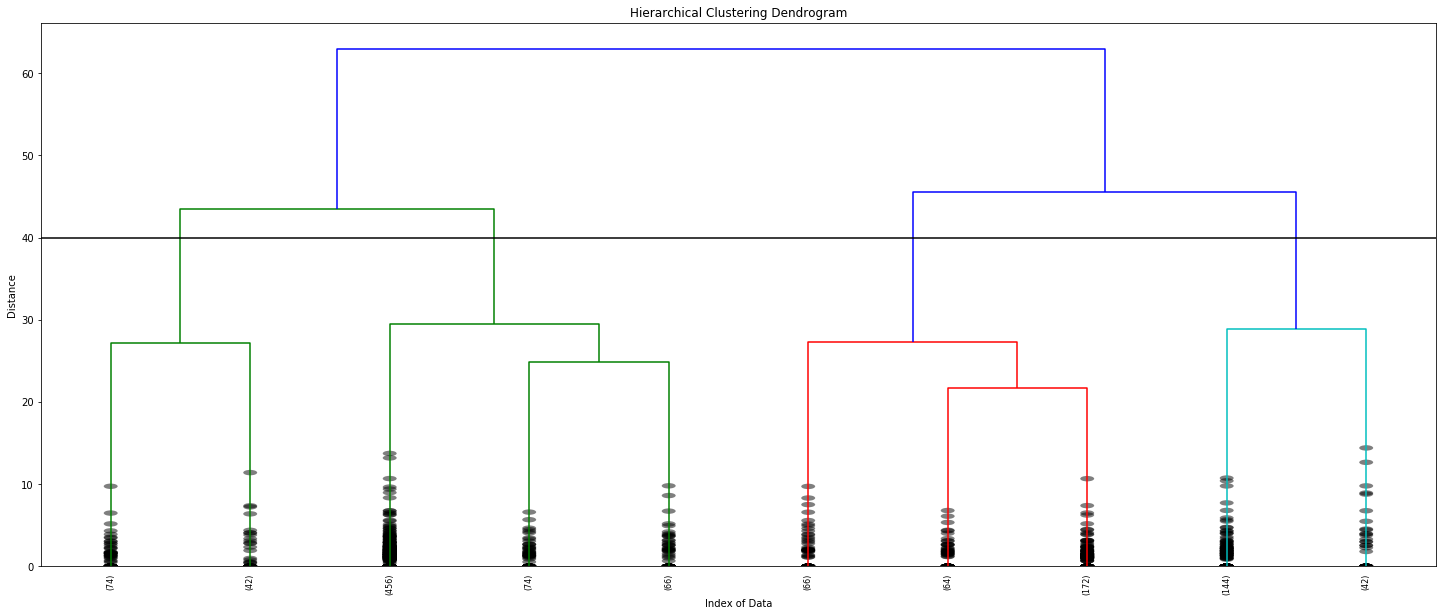

In [81]:
plot_dendrogram('Bath Soap Member Clustering', "Index", 'Distance'
                , Z, p=10, max_d=40)

In [82]:
predicted_labels_bath_soap = fcluster(Z, 40, criterion='distance')

In [83]:
scaled_df['predicted_labels'] = predicted_labels_bath_soap 

#### 5-3. 타겟 클러스터 선정 및 마케팅 기획
---
* 분석된 세분화에서 두 개의 클러스터를 선정하고, 그 집단의 특성에 대해 분석하시오.
* 선정한 두 클러스터에 대한 마케팅 전략을 수립하시오.

In [89]:
# Analysis
scaled_df.groupby('predicted_labels').mean().iloc[:, 10:30]

,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,"Br. Cd. 57, 144",Br. Cd. 55,Br. Cd. 272,Br. Cd. 286,Br. Cd. 24,Br. Cd. 481,Br. Cd. 352,Br. Cd. 5,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5
predicted_labels,,,,,,,,,,,,,,,,,,,,
1,1.873298,0.705316,-1.210354,0.939627,0.012676,0.047696,0.054981,0.687601,0.001045,0.022725,0.002217,0.004299,0.065702,0.010205,0.151224,0.062348,0.206420,0.704390,0.026843,0.120213
2,-0.213252,-0.181074,0.121810,0.913021,0.054957,0.032022,0.225177,0.069598,0.037982,0.031467,0.016724,0.026999,0.032821,0.016118,0.542968,0.297588,0.526744,0.080146,0.095522,0.509121
3,-0.268974,-0.625665,0.454016,0.894436,0.070837,0.034727,0.159560,0.042283,0.046058,0.036701,0.037168,0.025026,0.031065,0.029765,0.592373,0.395867,0.495882,0.046076,0.062175,0.424043
4,-0.048248,1.156207,-0.372638,0.926522,0.046142,0.027336,0.171053,0.114006,0.016767,0.044428,0.009333,0.037418,0.024267,0.010992,0.571736,0.165039,0.559837,0.127171,0.147953,0.554594


3번째 클러스터의 경우, 전반적으로 사회 상위 계층이 묶여있는 것을 알 수 있다. SEC가 약 2.1로 높고, 고학력이며(EDU가 5.11), 다양한 내구재를 보유하고 있다(Affluence Index 0.487). 이들은 평균적으로 구매하는 비누의 브랜드 개수가 많으나, 전체 구입량은 적다. 그렇지만 비싼 비누를 구매하는 그룹(Avg. Price 0.45)이다.

이들은 판촉에 의해서도 구매를 어느 정도 하는 그룹이기 때문에(Pur Vol No Promo - % 다른 그룹과 별 차이 없음), 마케팅의 효과를 볼 수 있는 그룹이다. 이 그룹을 떠올릴 수 있는 가상의 페르소나를 만들고 그 페르소나가 비싼 비누를 사용하는 광고를 촬영하여 구매 욕구를 자극한다면 이 그룹의 판매 욕구를 증진시킬 수 있을 것이다. 특히 여태까지 특별히 눈에 띄는 판촉에 읳